Proyecto final de Simulacion digital grupo D1

Javier David Landazabal landazabal-2151482

Oscar Andrés Corzo Gómez-2160041

Jose Nelson Amaris Ortiz-2160028

# COMPORTAMIENTO DEL PRECIO DE PRODUCTOS AGRÍCOLAS.


cargamos a colaboratory el archivo.xlsx

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn.metrics import mean_squared_error
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.holtwinters import ExponentialSmoothing
rcParams['figure.figsize'] = 10, 6

In [115]:
# import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving dataSetSimulation.xlsx to dataSetSimulation (1).xlsx


cargamos los datos al notebook

In [182]:
data = pd.read_excel('dataSetSimulation.xlsx')
print(data.head(-1))

         fecha  precio Variacion  cambio
0   2018-06-01   38000         b     NaN
1   2018-06-02   37000         b  1000.0
2   2018-06-03   37000         m     NaN
3   2018-06-04   40000         s  3000.0
4   2018-06-05   45000         s  5000.0
..         ...     ...       ...     ...
638 2020-02-29   28000         s  3000.0
639 2020-03-01   30000         s  2000.0
640 2020-03-02   35000         s  5000.0
641 2020-03-03   35000         m     NaN
642 2020-03-04   35000         m     NaN

[643 rows x 4 columns]


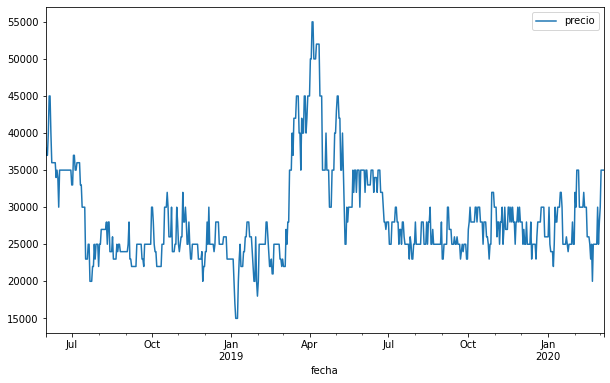

In [167]:
data.plot.line(x = 'fecha', 
             y = 'precio')

## Cadena de Markov


hacemos conteo de la cantidad de veces que varian los precios

In [119]:
varTotal=data['Variacion'].size
print(data['Variacion'].value_counts())
mantuvo=(data[data.Variacion == 'm'].size)/3
bajo=(data[data.Variacion == 'b'].size)/3
subio=(data[data.Variacion == 's'].size)/3

m    342
b    154
s    148
Name: Variacion, dtype: int64


In [120]:
print(data['precio'].value_counts())
print('El promedio de la variacion de precios fue de: ',data['cambio'].mean(), ' pesos')

25000    165
28000     81
30000     70
35000     60
23000     43
26000     34
24000     33
22000     29
27000     20
32000     17
45000     15
40000     12
20000     11
36000      9
33000      8
42000      7
34000      5
37000      5
50000      5
52000      4
15000      3
21000      2
55000      2
18000      1
17000      1
38000      1
43000      1
Name: precio, dtype: int64
El promedio de la variacion de precios fue de:  2900.0  pesos


sacamos las diferentes probabilidades de los precios (bajan, suben o se mantienen).

In [121]:
M=mantuvo/varTotal
B=bajo/varTotal
S=subio/varTotal
print('Se mantuvo',(M)*100,'%')
print('Bajo',(B)*100,'%')
print('Subio',(S)*100,'%')

Se mantuvo 70.80745341614907 %
Bajo 31.884057971014496 %
Subio 30.641821946169774 %


Ahora sacamos las diferentes probalidades de cambio de estado respecto a un estados especifico

In [134]:
# aqui se desea saber la probabilidad de cambio respecto al dia anterior
bb=0;bm=0;bs=0;mb=0;mm=0;ms=0;sb=0;sm=0;ss=0
for i in range (varTotal-1):
  if (data.iloc[i,2]=='b'):
    if (data.iloc[(i+1),2]=='b'):
      bb=bb+1
    if (data.iloc[(i+1),2]=='m'):
      bm=bm+1
    if (data.iloc[(i+1),2]=='s'):
      bs=bs+1

  if (data.iloc[i,2]=='s'):
    if (data.iloc[(i+1),2]=='b'):
      sb=sb+1
    if (data.iloc[(i+1),2]=='m'):
      sm=sm+1
    if (data.iloc[(i+1),2]=='s'):
      ss=ss+1

  if (data.iloc[i,2]=='m'):
    if (data.iloc[(i+1),2]=='b'):
      mb=mb+1
    if (data.iloc[(i+1),2]=='m'):
      mm=mm+1
    if (data.iloc[(i+1),2]=='s'):
      ms=ms+1

proBB=bb/(bb+bm+bs)
proBM=bm/(bb+bm+bs)
proBS=bs/(bb+bm+bs)
print('Probabilidad de mañana bajar el precio si hoy bajo es de: ',proBB*100,'%')
print('Probabilidad de mañana mantener el precio si hoy bajo es de: ',proBM*100,'%')
print('Probabilidad de mañana subir el precio si hoy bajo es de: ',proBS*100,'%\n')
proSB=sb/(sb+sm+ss)
proSM=sm/(sb+sm+ss)
proSS=ss/(sb+sm+ss)
print('Probabilidad de mañana bajar el precio si hoy subio es de: ',proSB*100,'%')
print('Probabilidad de mañana mantener el precio si hoy subio es de: ',proSM*100,'%')
print('Probabilidad de mañana subir el precio si hoy subio es de: ',proSS*100,'%\n')
proMB=mb/(mb+mm+ms)
proMM=mm/(mb+mm+ms)
proMS=ms/(mb+mm+ms)
print('Probabilidad de mañana bajar el precio si hoy se mantuvo es de: ',proMB*100,'%')
print('Probabilidad de mañana mantener el precio si hoy se mantuvo es de: ',proMM*100,'%')
print('Probabilidad de mañana subir el precio si hoy se mantuvo es de: ',proMS*100,'%')

Probabilidad de mañana bajar el precio si hoy bajo es de:  17.532467532467532 %
Probabilidad de mañana mantener el precio si hoy bajo es de:  50.0 %
Probabilidad de mañana subir el precio si hoy bajo es de:  32.467532467532465 %

Probabilidad de mañana bajar el precio si hoy subio es de:  35.810810810810814 %
Probabilidad de mañana mantener el precio si hoy subio es de:  52.702702702702695 %
Probabilidad de mañana subir el precio si hoy subio es de:  11.486486486486488 %

Probabilidad de mañana bajar el precio si hoy se mantuvo es de:  21.407624633431084 %
Probabilidad de mañana mantener el precio si hoy se mantuvo es de:  54.83870967741935 %
Probabilidad de mañana subir el precio si hoy se mantuvo es de:  23.75366568914956 %


Grafo de estados y probabilidades

In [135]:
from io import BytesIO
from PIL import Image
uploaded = files.upload()
im = Image.open(BytesIO(uploaded['mapa.jpg']))

Saving mapa.jpg to mapa.jpg


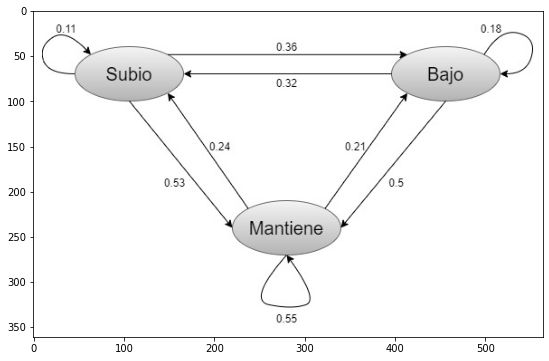

In [136]:
import matplotlib.pyplot as plt
plt.imshow(im)
plt.show()

Matriz de transicion

In [137]:
P = np.array([[proSS, proSM, proSB],
               [proMS, proMM, proMB],
               [proBS, proBM, proBB]])
P

array([[0.11486486, 0.52702703, 0.35810811],
       [0.23753666, 0.5483871 , 0.21407625],
       [0.32467532, 0.5       , 0.17532468]])

la matriz estacionaria es 

In [138]:
#p1 = np.array( [1, 0, 0] )
p1 = P
for i in range(1, 13):
    p_i = p1 @ P
    print('p_{0:} = {1:}'.format(i, p_i))
    p1 = p_i

p_1 = [[0.25465104 0.52860576 0.21674319]
 [0.22705193 0.53295477 0.2399933 ]
 [0.21298571 0.53296856 0.25404573]]
p_2 = [[0.22518487 0.53246016 0.24235497]
 [0.23059649 0.53192467 0.23747884]
 [0.23354652 0.53154517 0.2349083 ]]
p_3 = [[0.23103131 0.53185028 0.23711841]
 [0.22994256 0.53197063 0.23808681]
 [0.22935668 0.532032   0.23861132]]
p_4 = [[0.22985781 0.53197878 0.23816341]
 [0.23007576 0.53195518 0.23796906]
 [0.23019333 0.53194231 0.23786435]]
p_5 = [[0.23009283 0.53195328 0.23795389]
 [0.23004916 0.53195803 0.23799281]
 [0.23002561 0.53196059 0.2380138 ]]
p_6 = [[0.23004574 0.5319584  0.23799586]
 [0.23005449 0.53195745 0.23798806]
 [0.23005921 0.53195694 0.23798385]]
p_7 = [[0.23005518 0.53195738 0.23798745]
 [0.23005342 0.53195757 0.23798901]
 [0.23005248 0.53195767 0.23798985]]
p_8 = [[0.23005329 0.53195758 0.23798913]
 [0.23005364 0.53195754 0.23798882]
 [0.23005383 0.53195752 0.23798865]]
p_9 = [[0.23005366 0.53195754 0.2379888 ]
 [0.23005359 0.53195755 0.23798886]
 [

In [139]:
p1

array([[0.2300536 , 0.53195755, 0.23798885],
       [0.2300536 , 0.53195755, 0.23798885],
       [0.2300536 , 0.53195755, 0.23798885]])

En caso de que querramos hacer una prediccion del estado del precio para x dias, solo tenemos que mirar la matriz invariante de los datos obtenidos

In [140]:
print('Probabilidad de que mañana suba el precio si hoy bajó es de: ',P[2,0]*100,'%')
print('Probabilidad de que aqui en N dias suba el precio si hoy se mantuvo es de: ',p1[0,0]*100,'%')
print('Probabilidad de que aqui en N dias baje el precio si hoy se mantuvo es de: ',p1[0,2]*100,'%')
print('Probabilidad de que aqui en N dias se mantenga el precio si hoy se mantuvo es de: ',p1[0,1]*100,'%')

Probabilidad de que mañana suba el precio si hoy bajó es de:  32.467532467532465 %
Probabilidad de que aqui en N dias suba el precio si hoy se mantuvo es de:  23.00536004743098 %
Probabilidad de que aqui en N dias baje el precio si hoy se mantuvo es de:  23.798885331339108 %
Probabilidad de que aqui en N dias se mantenga el precio si hoy se mantuvo es de:  53.195754621229874 %


## Serie de Tiempo

In [183]:
data['fecha'] = pd.to_datetime(data['fecha'])
data.set_index('fecha', inplace=True)
ts = data['precio']
ts

fecha
2018-06-01    38000
2018-06-02    37000
2018-06-03    37000
2018-06-04    40000
2018-06-05    45000
              ...  
2020-03-01    30000
2020-03-02    35000
2020-03-03    35000
2020-03-04    35000
2020-03-05    35000
Name: precio, Length: 644, dtype: int64

Prueba de estacionariedad:

In [0]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

Realizaremos la prueba con los datos originales.

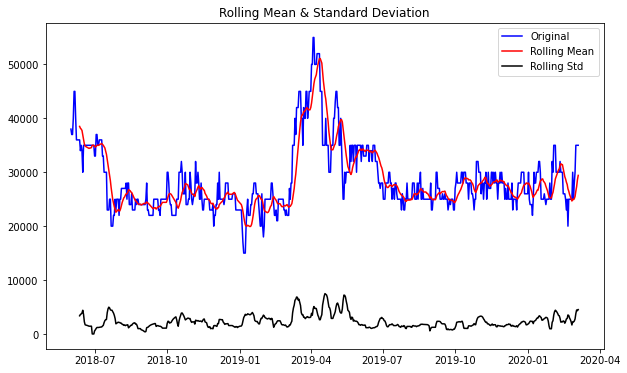

Results of Dickey-Fuller Test:
Test Statistic                  -3.951803
p-value                          0.001685
#Lags Used                       1.000000
Number of Observations Used    642.000000
Critical Value (1%)             -3.440577
Critical Value (5%)             -2.866052
Critical Value (10%)            -2.569173
dtype: float64


In [146]:
test_stationarity(ts)

Como lo muestra el testpodemos estar un 99% seguros de que nuestra serie de tiempo es estacionaria

### ARIMA

Ahora podemos realizar predicciones sobre nuestra serie de tiempo, para esto aplicaremos el metodo de ARIMA.

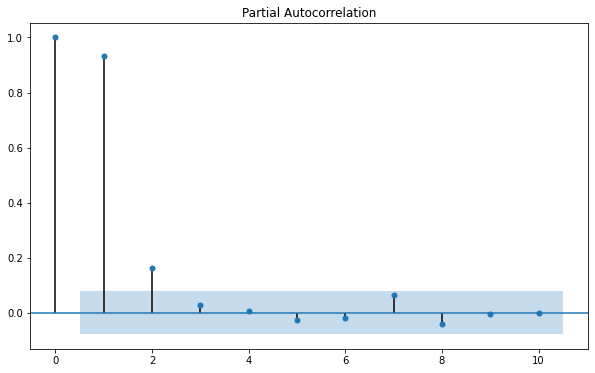

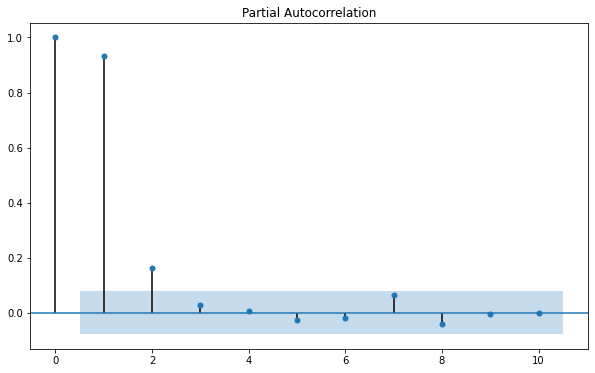

In [147]:
plot_pacf(ts, lags=10)

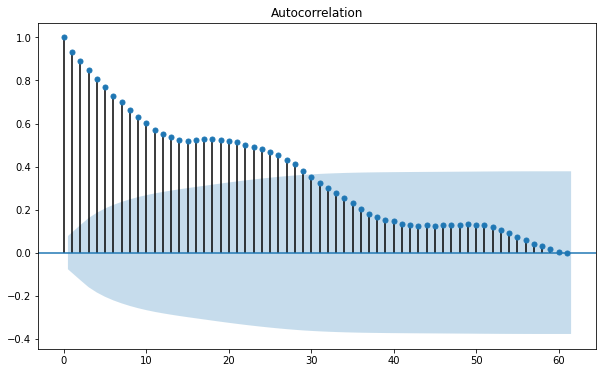

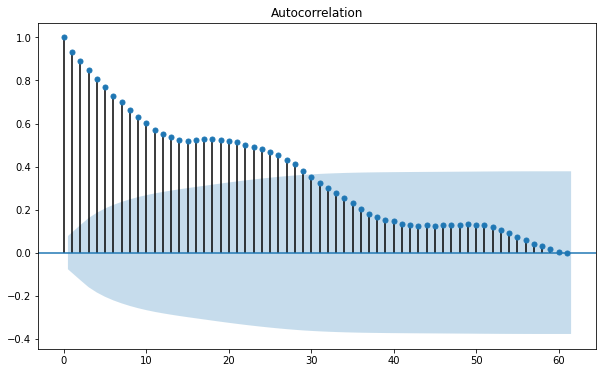

In [148]:
plot_acf(ts, lags=61)

Despues de realizar diferentes pruebas con los parametros p, d y q para obtener el mejor valor de RSS (suma del residual cuadrado) quedaron los siguientes:


In [149]:
model = ARIMA(ts, order=(5,0,61))
resultados_ARIMA = model.fit(disp=-1)
plt.plot(ts)
plt.plot(resultados_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((resultados_ARIMA.fittedvalues - ts)**2))
print('Plotting ARIMA model')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


KeyboardInterrupt: ignored

Se demora demasiado en el entrenamiento.

Si disminuye el valor de q tambien disminuye el tiempo de carga para celda, pero el valor de RSS para esos casos es demasiado alto

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


Plotting ARIMA model


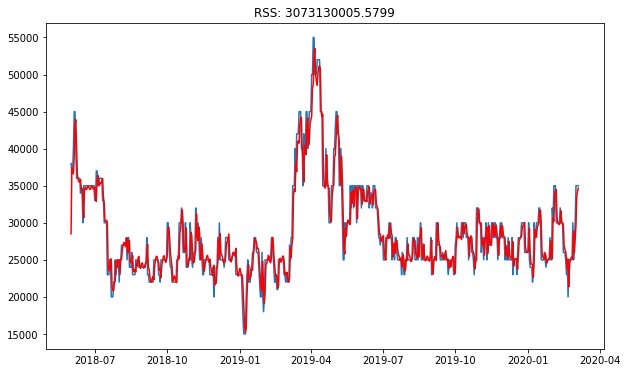

In [150]:
model = ARIMA(ts, order=(5,0,3))
resultados_ARIMA = model.fit(disp=-1)
plt.plot(ts)
plt.plot(resultados_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((resultados_ARIMA.fittedvalues - ts)**2))
print('Plotting ARIMA model')

Time Shift Transformation

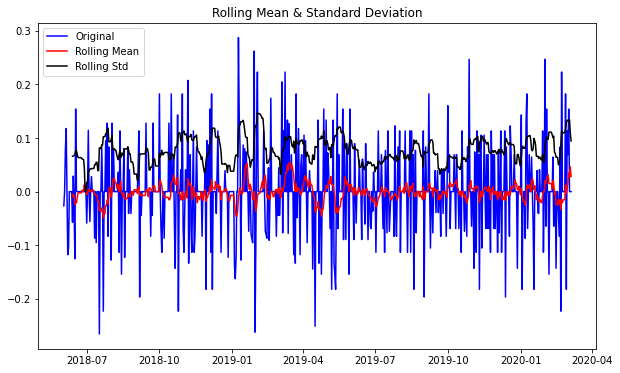

Results of Dickey-Fuller Test:
Test Statistic                -9.474765e+00
p-value                        4.017112e-16
#Lags Used                     1.500000e+01
Number of Observations Used    6.270000e+02
Critical Value (1%)           -3.440823e+00
Critical Value (5%)           -2.866161e+00
Critical Value (10%)          -2.569231e+00
dtype: float64


In [151]:
ts_log = np.log(ts)
tsf = ts_log - ts_log.shift()
tsf.dropna(inplace=True)
test_stationarity(tsf)

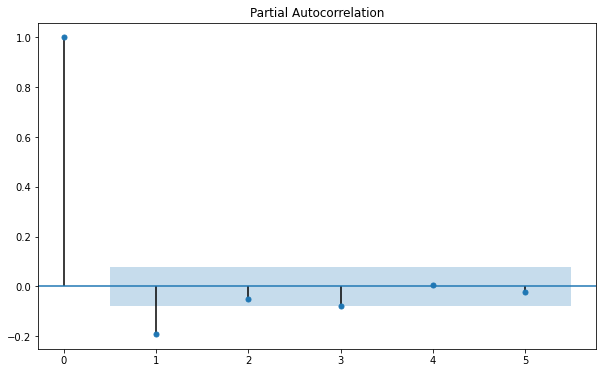

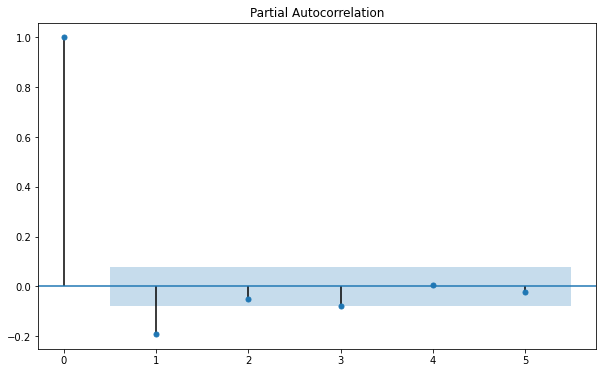

In [152]:
plot_pacf(tsf, lags=5)

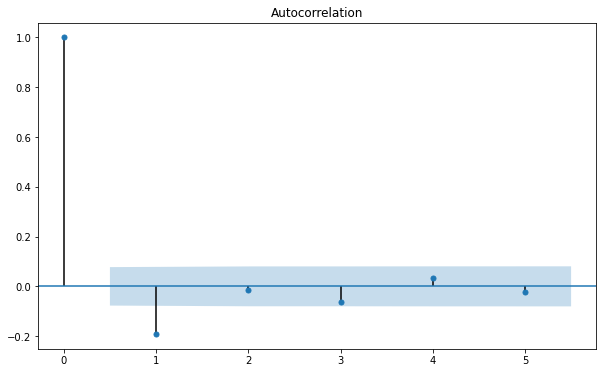

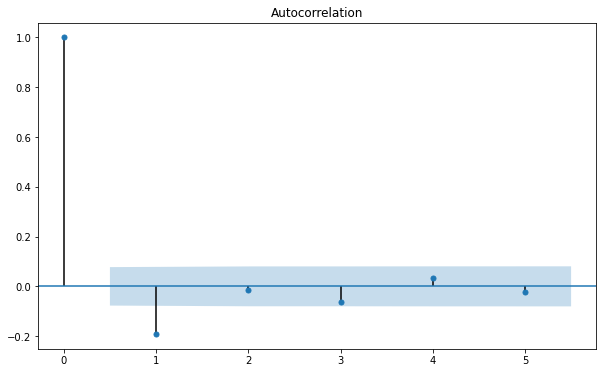

In [153]:
plot_acf(tsf, lags=5)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Plotting ARIMA model


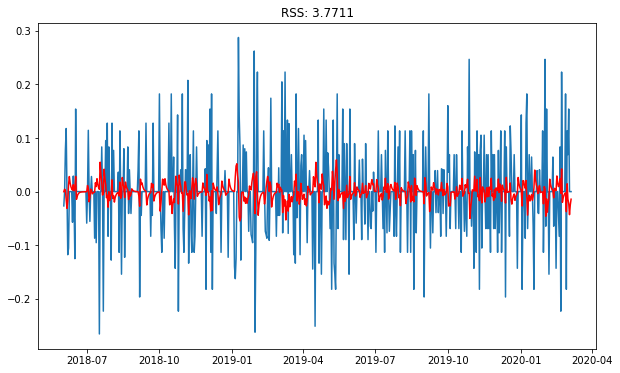

In [154]:
# si el parametro i=1 entonces rss=nan,
model = ARIMA(tsf, order=(1,0,1))
resultados_ARIMA = model.fit(disp=-1)
plt.plot(tsf)
plt.plot(resultados_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((resultados_ARIMA.fittedvalues - tsf)**2))
print('Plotting ARIMA model')

Si cambiamos los valores de AR y MA el RSS puede disminuir poco

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Plotting ARIMA model


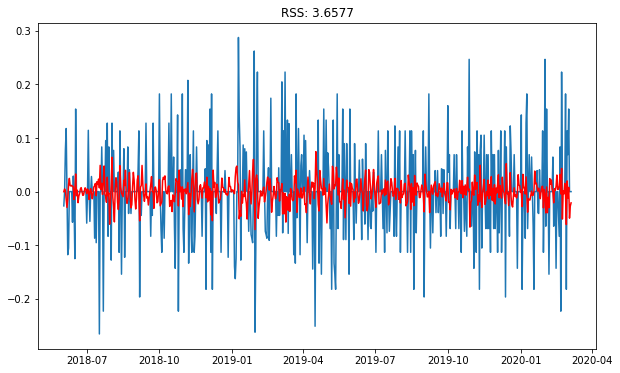

In [155]:
# si el parametro i=1 entonces rss=nan,
model = ARIMA(tsf, order=(5,0,2))
resultados_ARIMA_ = model.fit(disp=-1)
plt.plot(tsf)
plt.plot(resultados_ARIMA_.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((resultados_ARIMA_.fittedvalues - tsf)**2))
print('Plotting ARIMA model')

Usaremos el modelo con los parametros encontrados en las pruebas ACF y PACF

In [156]:
# pasamos los resultados de predicción al formato de series de Pandas Dataframe
predict_ARIMA_a = pd.Series(resultados_ARIMA.fittedvalues, copy=True)
# calculamos los valores adjuntados realizando una operacion acumulativa a los datos, como una funcion de probabilidad acumulativa
predict_ARIMA_acumulada = predict_ARIMA_a.cumsum()
predict_ARIMA_acumulada

fecha
2018-06-02   -0.000153
2018-06-03    0.004280
2018-06-04    0.006678
2018-06-05   -0.007269
2018-06-06   -0.038500
                ...   
2020-03-01    0.015879
2020-03-02   -0.005954
2020-03-03   -0.048985
2020-03-04   -0.073633
2020-03-05   -0.087793
Length: 643, dtype: float64

In [0]:
predict_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predict_ARIMA_log = predict_ARIMA_log.add(predict_ARIMA_acumulada, fill_value=0)
predict_ARIMA = np.exp(predict_ARIMA_log)

Ahora los datos de predicción deben ser transformados, es decir, quitar la funcion logaritmica.

In [0]:
predict_ARIMA = np.exp(predict_ARIMA_log)

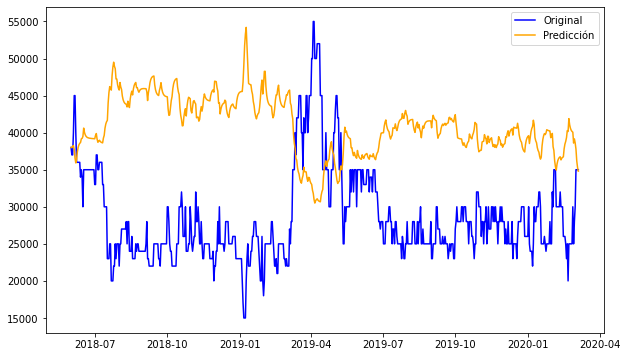

In [159]:
plt.plot(ts, color='blue', label='Original')
plt.plot(predict_ARIMA, color='orange', label='Predicción')
plt.legend(loc='best')
plt.show()

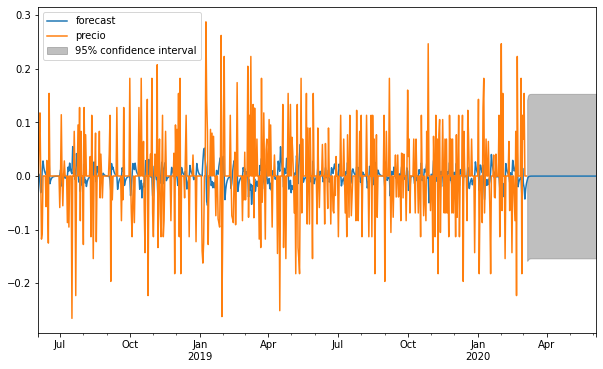

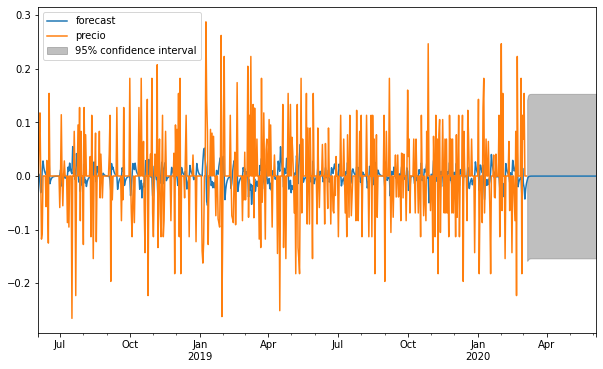

In [160]:
resultados_ARIMA.plot_predict(1,644+90) 

### Metodos de Suavizado

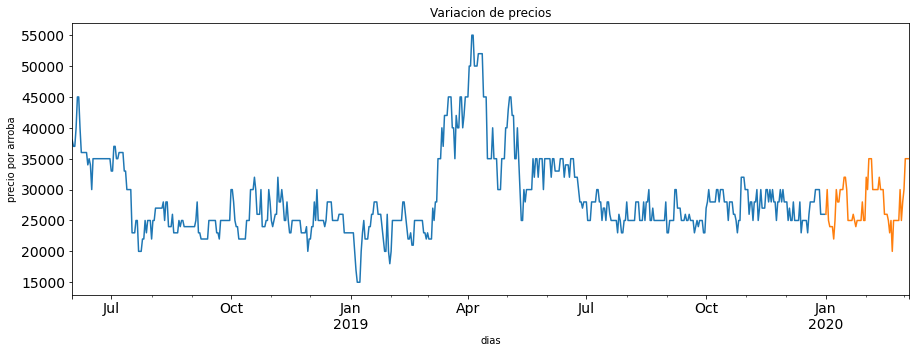

In [169]:
size=int(ts.shape[0]*.90)
train=ts[:size]
test=ts[size:]
train.plot(kind='line',figsize=(15,8), title= 'variacion', fontsize=14)
test.plot(figsize=(15,5), title= 'Variacion de precios', fontsize=14)
plt.ylabel('precio por arroba')
plt.xlabel('dias')
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


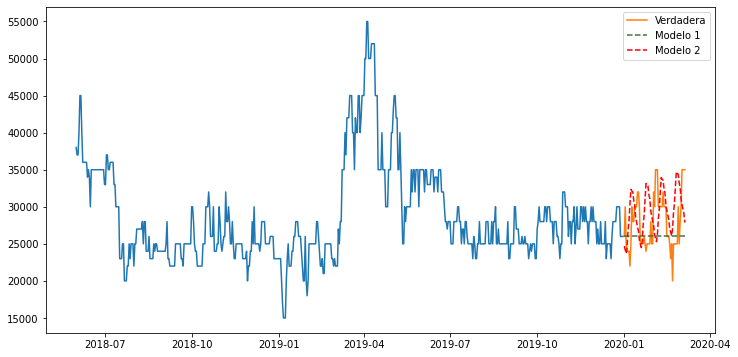

In [184]:
# creamos los modelos.
modelo1 = ExponentialSmoothing(train, trend='mul', seasonal=None, damped=True)
modelo2 = ExponentialSmoothing(train ,seasonal_periods=16 ,trend='add', seasonal='add')
# Entrenamos los modelos.
fit1 = modelo1.fit()
fit2 = modelo2.fit()
# Realizamos las predicciones
pred1 = fit1.forecast(644-size)
pred2 = fit2.forecast(644-size)

# Graficamos las predicciones.
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train.index, train.values);
ax.plot(test.index, test.values, label='Verdadera');
ax.plot(test.index, pred1, linestyle='--', color='#3c763d', label='Modelo 1');
ax.plot(test.index, pred2, linestyle='--', color='red', label='Modelo 2');
ax.legend();

## MONTE CARLO

In [0]:
def simulacionMC(num_dias=100):
  fecha1 = list(pd.date_range(start='2020-03-06', periods=num_dias, freq='1D')) #obtiene la fecha para los dias que se quieren simular
  precio = data["precio"][-1] #ultimo precio o precio REAL
  prec =  []
  var = []
  valor=data['cambio'].mean()   #es el valor promedio de la variacion de precio de bajada
  for i in range(num_dias):
    GhP = np.random.randint(0, 100);
    if GhP < 23.005:
      precio = precio + valor
      prec.append(precio)
      var.append('s')
    if GhP > 23.005 and GhP < 76.2:
      precio = precio
      prec.append(precio)
      var.append('m')
    if GhP > 76.2:
      precio = precio -valor
      prec.append(precio)
      var.append('b')
  #creamos el diccionario
  datos = {'fecha':fecha1,'precio':prec,'variacion':var,}
  MC = pd.DataFrame(data=datos,index=fecha1)
  MC.plot.line(x = 'fecha', y = 'precio')
    
  return MC

In [0]:
def MonteCarlo(iteraciones):
  estimaciones = []
  for i in range (iteraciones):
    MC = simulacionMC()
    valor= MC["precio"][-1]
    estimaciones.append(valor)
  return estimaciones
  

[14700.0, 46600.0, 37900.0]

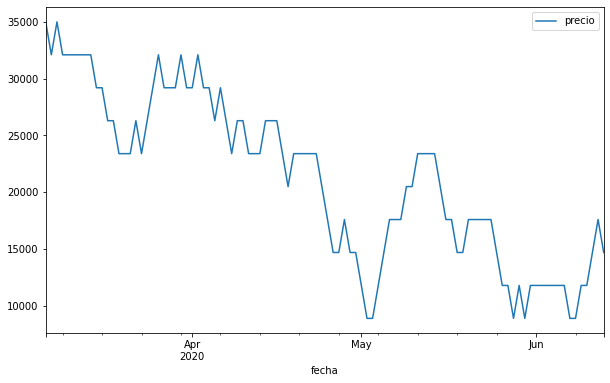

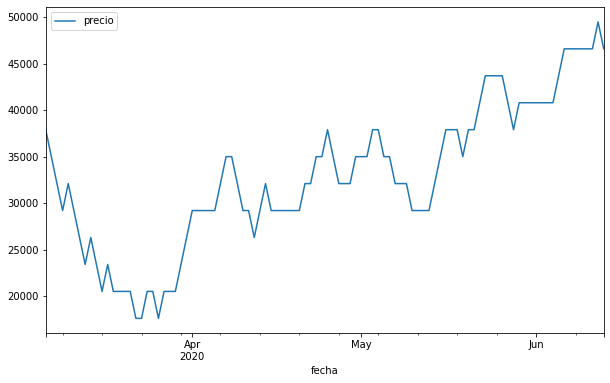

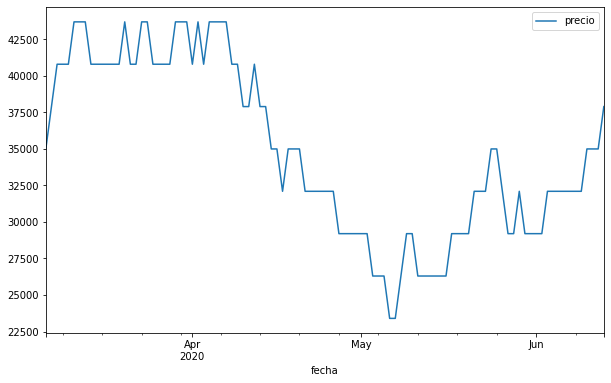

In [164]:
MonteCarlo(3)

Como podemos ver, la simulacion de Monte Carlo con Cadenas de Markov, nos brinda una proyecion de como podria variar el precio en el futuro, en este caso se quiso ver como seria el precio unos 200 dias despues de la ultima medicion REAL del precio de la mora.

### CONCLUSIONES 
A partir del análisis de los datos la mora castilla evidenciamos que este proyecto tiene buen potencial para resolver el problema propuesto, las cadenas de Markov son buena herramienta para predecir el comportamiento del precio con el limitante de los pocos datos que tenemos. En la parte de predecir el valor aproximado que puede tener el producto en estudio, el método de Monte Carlo da mejores resultados que los de Series de Tiempo, lo cual puede cambiar al disminuir la incidencia del limitante ya mencionado. Este procedimiento puede ser extendido para mas productos asi presenten o no una gran variabilidad en sus precios.